#Exercise
This is a dataset related to how much money a person can get from a mortgage on his or her home. This dataset includes the following features:
* Gender: Gender of the borrower (including two values 'F' and 'M')
* Age: Age of the customer applying for a loan (including positive integer values)
* Income (USD): Customer's income in USD (value is a positive number)
* Income Stability: The level of customer's income stability (including three values of Low and High)
* Property Age: Life expectancy of the house in days (including positive integer values)
* Property Location: Location of the house (including 'Rural', 'Urban', and 'Semi-Urban')
* Property Price: The value of the house in USD (including positive real values)
* Loan Sanction Amount (USD): Amount that customers can borrow in USD (target value)

Based on practice sample #1, proceed:
1. Read data
2. Visualize some information of data
3. Normalize Data to train linear regression model
4. Train linear regression model and show the model's intercepts, coeficients
5. Learn on sklearn how to use Ridge, Lasso, and ElasticNet compare the error of all 3 algorithms with Linear Regression (https://scikit-learn.org/stable/index.html)
6. Let's try Polynomial of order 2 to compare the previous results. What will the result be if we choose the n order too high?


**Submission Link**: https://forms.gle/WKCJUp7noHAKALNP9 (Submit your .ipynb file)

In [ ]:
# mount data from google drive to colab
from google.colab import drive
drive.mount('/content/drive')

#import library
import pandas as pd # pandas 
import numpy as np # numpy
import time


Mounted at /content/drive


# Prepare and Analyze Data

1. Load Dataset
2. Analyze Dataset
3. Preprocess data (type, null, missing, ...)
4. Feature Engineering

## Load Dataset

In [ ]:
# read data using Pandas DataFrame
def read_dataset(path):
    # Todo: read_csv from a path and return a DataFrame
    df = pd.read_csv(path)
    display(df.head())
    display(df.describe())
    return df

In [ ]:
PATH = '/content/drive/MyDrive/ML_HCMUS/final_house_loan.csv' # Path to your file
df = read_dataset(PATH)
#ToDo: Show histogram of dataframe

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336


,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
count,47297.000000,47265.000000,47263.000000,4.729700e+04,47297.000000
mean,40.000063,2586.684384,2586.611058,1.350880e+05,46487.229765
std,16.086128,1558.768809,1558.842286,9.457875e+04,32549.905634
min,18.000000,372.700000,370.700000,7.859620e+03,254.586578
25%,24.000000,1653.740000,1652.820000,6.250408e+04,21782.822159
50%,40.000000,2245.480000,2244.810000,1.130936e+05,38822.132402
75%,55.000000,3128.560000,3128.380000,1.819546e+05,62612.236905
max,65.000000,54662.750000,54647.750000,1.077967e+06,366131.165218


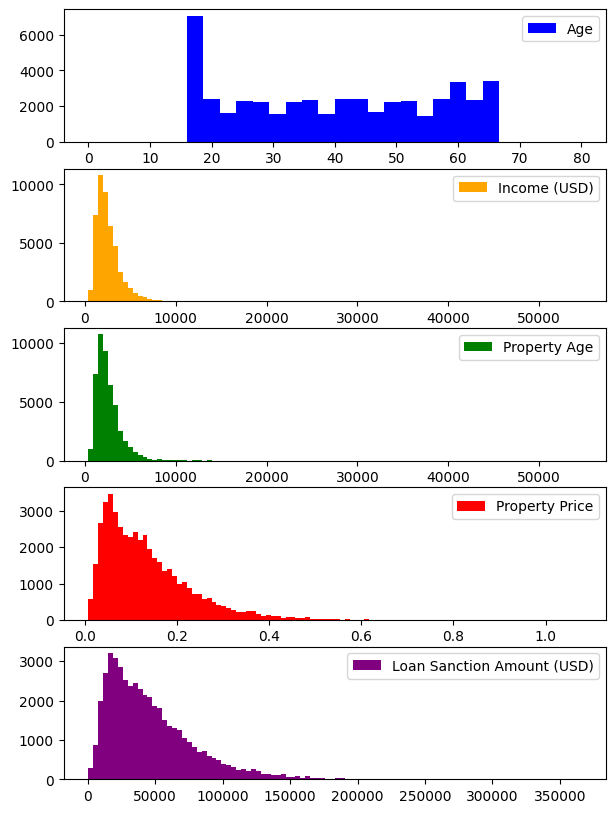

In [ ]:
#histogram of dataframe
import matplotlib.pyplot as plt
fig, ax = plt.subplots(5,1, figsize=(7,10))
ax[0].hist(df['Age'], bins=30, range=(0,80), color='blue', label='Age')
ax[0].legend()
ax[1].hist(df['Income (USD)'], bins=100, color = 'orange', label='Income (USD)')
ax[1].legend()
ax[2].hist(df['Property Age'],bins=100, color='green', label='Property Age')
ax[2].legend()
ax[3].hist(df['Property Price'],bins=100, color='red', label = 'Property Price')
ax[3].legend()
ax[4].hist(df['Loan Sanction Amount (USD)'],bins=100, color='purple', label='Loan Sanction Amount (USD)')
ax[4].legend()

## Data Analysis

<Axes: >

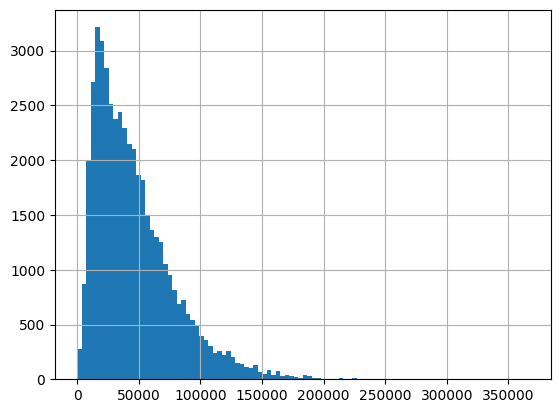

In [ ]:
# Data analysis
# Todo: analyze your data here
df['Loan Sanction Amount (USD)'].hist(bins=100)

In [ ]:
df.isnull().sum()
#Bởi vì lượng dữ liệu bị null là tương đối ít so với lượng dữ liệu tổng trong dataset, ta sẽ drop những dữ liệu này

Gender                         0
Age                            0
Income (USD)                  32
Income Stability              12
Property Age                  34
Property Location              3
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

## Preprocessing

In [ ]:
def preprocessing_data(df):
    # --- (Optional) Drop null datapoints or fill missing data
    # Keep your data the same if you dont want to customize it
    df.dropna(inplace=True)
    return df

In [ ]:
#DROP NULL DATAPOINTS (Vì số lượng datapoint chứa giá trị null là tương đối thấp so với dataset nên ta có thể bỏ những datapoint này)
df = preprocessing_data(df.copy())
df.isnull().sum()

Gender                        0
Age                           0
Income (USD)                  0
Income Stability              0
Property Age                  0
Property Location             0
Property Price                0
Loan Sanction Amount (USD)    0
dtype: int64

## Feature Engineering

In [ ]:
def normalize_data(df):
  #NORMALIZE CATEGORICAL DATA
  normalized_data = df.copy()
  normalized_data['Gender'] = normalized_data['Gender'].astype('category').cat.codes
  normalized_data['Income Stability'] = normalized_data['Income Stability'].astype('category').cat.codes
  normalized_data['Property Location'] = normalized_data['Property Location'].astype('category').cat.codes

  #NORMALIZE NUMERIC DATA USING Z-SCORE
  columns = ['Age', 'Income (USD)', 'Property Age', 'Property Price']
  for column in columns:
    normalized_data[column] = (normalized_data[column] - normalized_data[column].mean())/normalized_data[column].std()
  return normalized_data

   Gender       Age  Income (USD)  Income Stability  Property Age  \
0       0 -1.305760     -0.606832                 1     -0.600369   
1       1 -0.684123     -0.383127                 1     -0.382450   
2       0 -0.186813     -0.472876                 1     -0.468344   
3       1  1.553770      0.095451                 0      0.103171   
4       0  1.367279      1.383652                 0      1.382975   

   Property Location  Property Price  Loan Sanction Amount (USD)  
0                  0       -0.797685                21026.420753  
1                  2        0.473185                60595.183366  
2                  0       -0.188177                39181.648002  
3                  0        2.318536               128497.710865  
4                  2       -0.560799                39386.919336  


<Axes: >

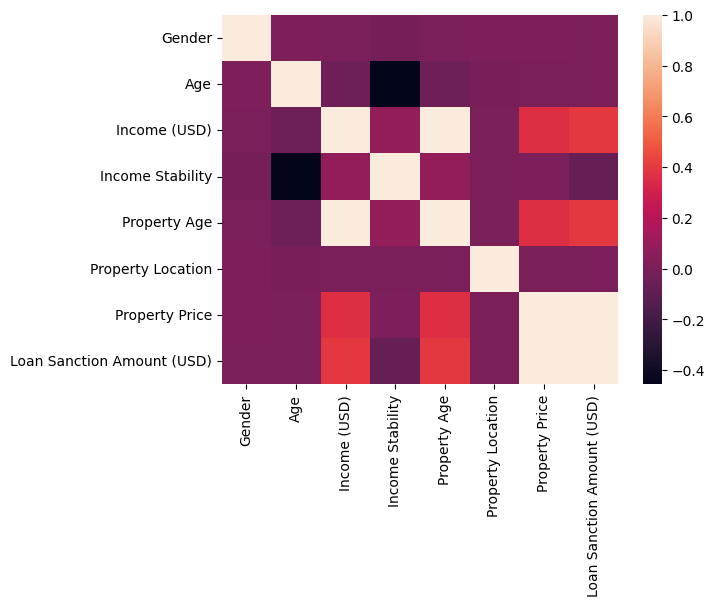

In [ ]:
# Heatmap
import seaborn as sns
df = normalize_data(df.copy())
print(df.head())
sns.heatmap(df.corr()) # Show heatmap after normalized data

# Apply machine learning model

## Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
def prepare_X_y(df):
    # Split data into X and y. Return two dataframes
    columns = df.columns.tolist()
    columns.remove('Loan Sanction Amount (USD)')
    X = df[columns]# Todo: Select features
    y = df['Loan Sanction Amount (USD)']# Todo: Select label
    return X, y

X, y = prepare_X_y(df)
print('Features:')
print(X)
print('Labels:')
print(y)

Features:
       Gender       Age  Income (USD)  Income Stability  Property Age  \
0           0 -1.305760     -0.606832                 1     -0.600369   
1           1 -0.684123     -0.383127                 1     -0.382450   
2           0 -0.186813     -0.472876                 1     -0.468344   
3           1  1.553770      0.095451                 0      0.103171   
4           0  1.367279      1.383652                 0      1.382975   
...       ...       ...           ...               ...           ...   
47292       0  1.367279     -0.298533                 1     -0.289514   
47293       1 -0.124650     -0.693198                 1     -0.693793   
47294       0 -1.243596     -0.636459                 1     -0.644760   
47295       0  0.621315     -0.375064                 1     -0.371819   
47296       0  0.372660     -1.344045                 1     -1.340763   

       Property Location  Property Price  
0                      0       -0.797685  
1                      2   

In [ ]:
def split_train_test(X, y, train_size=0.7):
    trainX, testX ,trainY, testY = train_test_split(X, y, train_size=train_size, random_state = 1)# Use sklearn train_test_split to split X and y into 2 sets: train set and test set. With train_size is the proportion of train_set and fix the random_state with a number
    print('Training:' + str(trainX.shape))
    print('Test:' + str(testX.shape))
    return trainX, testX ,trainY, testY

In [ ]:
TRAIN_SIZE = 0.7
trainX, testX ,trainY, testY = split_train_test(X, y, train_size=TRAIN_SIZE)

Training:(33075, 7)
Test:(14176, 7)


## Basic Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
def build_linear_model(X, y):
    model = LinearRegression(fit_intercept=True)# Todo: use sklearn model and config your parameters
    model.fit(X,y)# Todo: fit your model with X, y
    return model

model = build_linear_model(trainX, trainY)
# Compare on training dataset
pred_train = model.predict(trainX)   


print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred_train, y_true=trainY))
pred_test = model.predict(testX)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred_test, y_true=testY))

print('Coefficients of model: \n', model.coef_) # print coefficient
print()
print('Intercept of model: \n', model.intercept_) # print intercept_

result_Linear = [mean_absolute_error(y_pred=pred_train, y_true=trainY), mean_absolute_error(y_pred=pred_test, y_true=testY)]

mean absolute error of linear model on train set  143.05682961016342
mean absolute error of linear model on test set  150.92800744760865
Coefficients of model: 
 [  -246.85832402  -1270.37375658    825.34747703 -11142.32846807
    772.22655496    -58.1886741   31796.54640437]

Intercept of model: 
 56802.61364761239


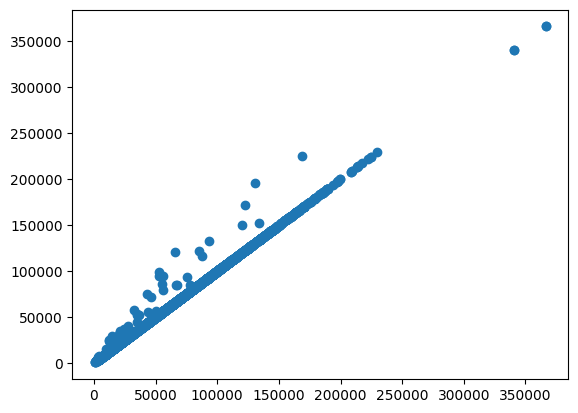

In [ ]:
plt.scatter(pred_test, testY)

## Lasso

In [ ]:
from sklearn.linear_model import Lasso


def build_lasso_model(X, y):
    model = Lasso(alpha=0.1, fit_intercept=True)# Todo: use sklearn model and config your parameters
    model.fit(X,y)# Todo: fit your model with X, y
    return model

model = build_lasso_model(trainX, trainY)
# Compare on training dataset
pred_train = model.predict(trainX)   
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred_train, y_true=trainY) )
pred_test = model.predict(testX)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred_test, y_true=testY) )

print('Coefficients of model: \n', model.coef_) # print coefficient
print()
print('Intercept of model: \n', model.intercept_) # print intercept_

result_Lasso = [mean_absolute_error(y_pred=pred_train, y_true=trainY), mean_absolute_error(y_pred=pred_test, y_true=testY)]

mean absolute error of linear model on train set  143.12514669384055
mean absolute error of linear model on test set  150.9792695742246
Coefficients of model: 
 [  -246.51953439  -1269.97836695   1344.00968247 -11140.33462093
    253.48876072    -58.07332901  31796.46465789]

Intercept of model: 
 56800.51865800469


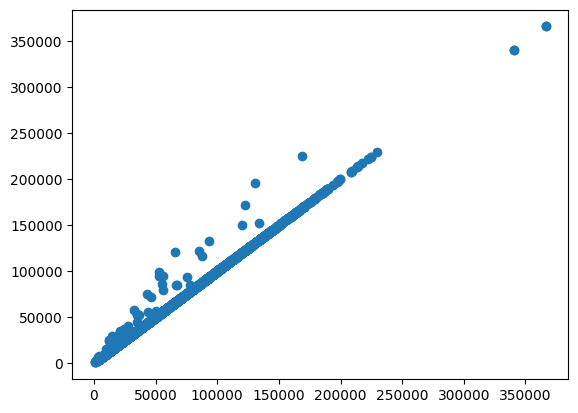

In [ ]:
plt.scatter(pred_test, testY)

## Ridge


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso


def build_ridge_model(X, y):
    model = Ridge(alpha=7, fit_intercept=True)# Todo: use sklearn model and config your parameters
    model.fit(X,y)# Todo: fit your model with X, y

    return model

model = build_ridge_model(trainX, trainY)
# Compare on training dataset
pred_train = model.predict(trainX)   
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred_train, y_true=trainY) )
pred_test = model.predict(testX)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred_test, y_true=testY) )

print('Coefficients of model: \n', model.coef_) # print coefficient
print()
print('Intercept of model: \n', model.intercept_) # print intercept_

result_Ridge = [mean_absolute_error(y_pred=pred_train, y_true=trainY), mean_absolute_error(y_pred=pred_test, y_true=testY)]

mean absolute error of linear model on train set  141.99158931028234
mean absolute error of linear model on test set  149.8447351431397
Coefficients of model: 
 [  -246.23902266  -1265.30394463    802.86593468 -11105.82514831
    796.57032218    -58.14476525  31789.02892419]

Intercept of model: 
 56768.980735999736


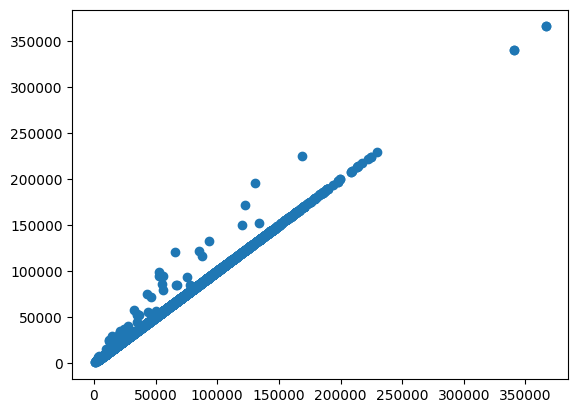

In [ ]:
plt.scatter(pred_test, testY)

## ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet


def build_elastic_model(X, y):
    model = ElasticNet(alpha=0.1,l1_ratio=1)# Todo: use sklearn model and config your parameters
    model.fit(X,y)# Todo: fit your model with X, y

    return model

model = build_elastic_model(trainX, trainY)
# Compare on training dataset
pred_train = model.predict(trainX)   
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred_train, y_true=trainY) )
pred_test = model.predict(testX)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred_test, y_true=testY) )

print('Coefficients of model: \n', model.coef_) # print coefficient
print()
print('Intercept of model: \n', model.intercept_) # print intercept_


result_Elastic = [mean_absolute_error(y_pred=pred_train, y_true=trainY), mean_absolute_error(y_pred=pred_test, y_true=testY)]

mean absolute error of linear model on train set  143.12514669384055
mean absolute error of linear model on test set  150.9792695742246
Coefficients of model: 
 [  -246.51953439  -1269.97836695   1344.00968247 -11140.33462093
    253.48876072    -58.07332901  31796.46465789]

Intercept of model: 
 56800.51865800469


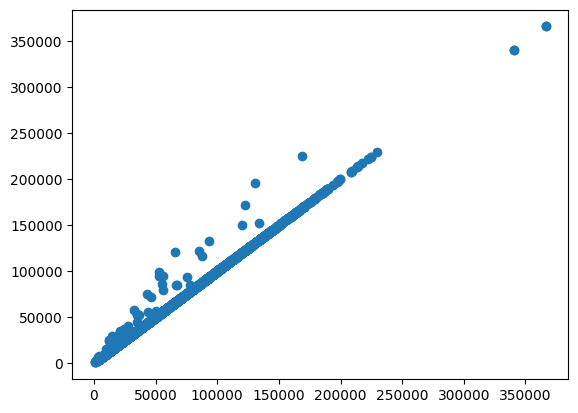

In [ ]:
plt.scatter(pred_test, testY)

##So sánh 4 model

In [ ]:
#compare
print('{model}:\n mean absolute error of {model} model on train set: {train} \tmean absolute error of {model} model on test set: {test}'.format(model='Linear Regression', train=result_Linear[0], test=result_Linear[1]))
print('{model}:\n mean absolute error of {model} model on train set: {train} \tmean absolute error of {model} model on test set: {test}'.format(model='Lasso', train=result_Lasso[0], test=result_Lasso[1]))
print('{model}:\n mean absolute error of {model} model on train set: {train} \tmean absolute error of {model} model on test set: {test}'.format(model='Ridge',train=result_Ridge[0], test=result_Ridge[1]))
print('{model}:\n mean absolute error of {model} model on train set: {train} \tmean absolute error of {model} model on test set: {test}'.format(model='ElasticNet', train=result_Elastic[0], test=result_Elastic[1]))
#Có thể thấy các giá trị mean absolute error giữa các model là gần tương đương nhau, do đó có thể xem các model này có hiệu suất tương đương

Linear Regression:
 mean absolute error of Linear Regression model on train set: 143.05682961016342 	mean absolute error of Linear Regression model on test set: 150.92800744760865
Lasso:
 mean absolute error of Lasso model on train set: 143.12514669384055 	mean absolute error of Lasso model on test set: 150.9792695742246
Ridge:
 mean absolute error of Ridge model on train set: 141.99158931028234 	mean absolute error of Ridge model on test set: 149.8447351431397
ElasticNet:
 mean absolute error of ElasticNet model on train set: 143.12514669384055 	mean absolute error of ElasticNet model on test set: 150.9792695742246


Có thể thấy các giá trị mean absolute error giữa các model là gần tương đương nhau, do đó có thể xem các model này có hiệu suất tương đương

## Polynomial Transform 

When the data feature does not conform to a linear function, a linear regression cannot be applied directly to the original data. Then, there are many possibilities that the data feature conforms to the polynomial function. Scikit-Learn supports converting data features to polynomials through ``PolynomialFeatures``.

$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$

The formula above uses the transformation of the value $x$ from one dimension to the other, with the aim of being able to use linear regression to find complex relationships between $x$ and $y$.

###Polynomial of Order 2

In [ ]:
#Linear Regression with Polynomial Transform
#Polynomial of Order 2
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def build_pipeline(X, y):
    poly_model = make_pipeline(PolynomialFeatures(2,include_bias=False), LinearRegression()) # use make_pipeline to apply PolynomialFeatures and a Regression model train your dataset
    poly_model.fit(X, y)  

    return poly_model
# Compare on training dataset
poly_model = build_pipeline(trainX,trainY)
poly_pred_train = poly_model.predict(trainX)   
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred_train, y_true=trainY) )

poly_pred_test = poly_model.predict(testX)
print("mean absolute error of linear model (with poly transform) on test set ", mean_absolute_error(y_pred=poly_pred_test, y_true=testY))

result_Polynomial = [mean_absolute_error(y_pred=poly_pred_train, y_true=trainY), mean_absolute_error(y_pred=poly_pred_test, y_true=testY)]

mean absolute error of linear model (with poly transform) on train set  136.4407235321295
mean absolute error of linear model (with poly transform) on test set  145.95786843918455


In [ ]:
#So sánh Polynomial và Linear Regression 
print('{model}:\n mean absolute error of {model} model on train set: {train} \tmean absolute error of {model} model on test set: {test}'.format(model='Linear Regression', train=result_Linear[0], test=result_Linear[1]))
print('{model}:\n mean absolute error of {model} model on train set: {train} \tmean absolute error of {model} model on test set: {test}'.format(model='Polynomial', train=result_Polynomial[0], test=result_Polynomial[1]))

Linear Regression:
 mean absolute error of Linear Regression model on train set: 143.05682961016342 	mean absolute error of Linear Regression model on test set: 150.92800744760865
Polynomial:
 mean absolute error of Polynomial model on train set: 136.4407235321295 	mean absolute error of Polynomial model on test set: 145.95786843918455


mean absolute error trên cả tập train lẫn test của Polynomial thấp hơn => Polynomial bậc 2 hoạt động tốt hơn

###Polynomial of Order 3 and 6


In [ ]:
#Linear Regression with Polynomial Transform
#Polynomial of Order higher than 2
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def build_pipeline(X, y, n):
    poly_model = make_pipeline(PolynomialFeatures(n,include_bias=False), LinearRegression()) # use make_pipeline to apply PolynomialFeatures and a Regression model train your dataset
    poly_model.fit(X, y)  

    return poly_model
# Compare on training dataset
poly_model = build_pipeline(trainX,trainY, 3)
poly_pred_train = poly_model.predict(trainX)   
print("mean absolute error of linear model (with poly transform of order 3) on train set ", mean_absolute_error(y_pred=poly_pred_train, y_true=trainY))

poly_pred_test = poly_model.predict(testX)
print("mean absolute error of linear model (with poly transform of order 3) on test set ", mean_absolute_error(y_pred=poly_pred_test, y_true=testY))
print()
poly_model = build_pipeline(trainX,trainY, 6)
poly_pred_train = poly_model.predict(trainX)   
print("mean absolute error of linear model (with poly transform of order 6) on train set ", mean_absolute_error(y_pred=poly_pred_train, y_true=trainY))

poly_pred_test = poly_model.predict(testX)
print("mean absolute error of linear model (with poly transform of order 6) on test set ", mean_absolute_error(y_pred=poly_pred_test, y_true=testY))

mean absolute error of linear model (with poly transform of order 3) on train set  140.2002874151902
mean absolute error of linear model (with poly transform of order 3) on test set  149.83009620320541

mean absolute error of linear model (with poly transform of order 6) on train set  163.1420161721226
mean absolute error of linear model (with poly transform of order 6) on test set  226.11160617833642


Với bậc cao hơn 2, model train chậm hơn và error cũng cao hơn. Bậc càng cao, mô hình càng kém hiệu quả

##Visualization

In [ ]:
from sklearn.manifold import TSNE

# Split X, y from dataset
columns = df.columns.tolist()     # Columns name
draw_data = df[columns]        # X 
draw_data = TSNE(n_components=1, learning_rate='auto', init='random', perplexity=3).fit_transform(draw_data)

In [ ]:
from sklearn.model_selection import train_test_split
draw_train_X, draw_test_X ,trainY, testY = train_test_split(draw_data, y, train_size=0.70, random_state=2023)
print('Training:' + str(trainX.shape))
print('Test:' + str(testX.shape))


Training:(33075, 7)
Test:(14176, 7)


In [ ]:
#model basic 
model = LinearRegression(fit_intercept=True)   
model.fit(draw_train_X, trainY)
pred = model.predict(draw_train_X)
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )

mean absolute error of linear model on train set  24934.656346688895


In [ ]:
#model polinomial 
poly_model = make_pipeline(PolynomialFeatures(2, include_bias=False), LinearRegression())
poly_model.fit(draw_train_X, trainY)
poly_pred = poly_model.predict(draw_train_X)
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred, y_true=trainY) )

mean absolute error of linear model (with poly transform) on train set  23088.018532360133


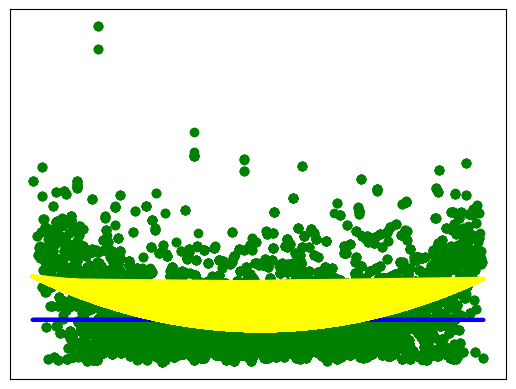

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(draw_train_X, trainY, color="g")
plt.plot(draw_train_X, pred, color="blue", linewidth=3)
plt.plot(draw_train_X, poly_pred, color="yellow", linewidth=3)


plt.xticks(())
plt.yticks(())

plt.show()

#Finding Good Parameters for Lasso, Ridge, ElasticNet


In [ ]:
TRAIN_SIZE = 0.7
trainX, testX ,trainY, testY = split_train_test(X, y, train_size=TRAIN_SIZE)

##Lasso

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
grid = [
    {'alpha': [0.5, 1, 2, 5, 7, 10, 15, 20]}
    ]
from sklearn.model_selection import GridSearchCV
model = Lasso()
grid_search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(trainX,trainY)
grid_search.best_params_

{'alpha': 0.5}

Text(0.5, 0.98, 'Lasso MAE with each alpha')

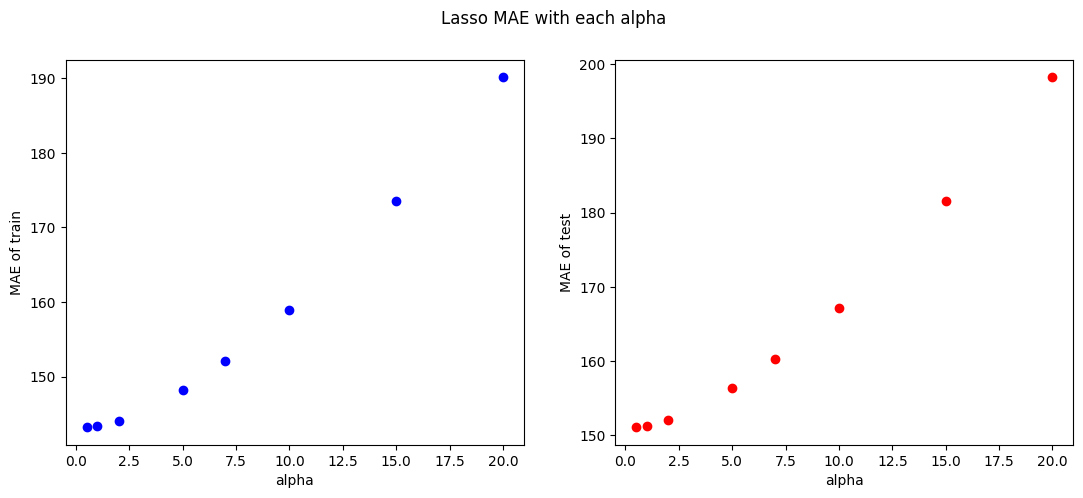

In [ ]:
# Compare on training dataset
train = []
test = []
for i in range(len(grid[0]['alpha'])):
  model = Lasso(alpha = grid[0]['alpha'][i])
  model.fit(trainX, trainY)
  pred_train = model.predict(trainX)   
  train.append(mean_absolute_error(y_pred=pred_train, y_true=trainY))
  pred_test = model.predict(testX)   
  test.append(mean_absolute_error(y_pred=pred_test, y_true=testY))
fig, ax = plt.subplots(1,2, figsize=(13,5))
ax[0].plot(grid[0]['alpha'], train, 'bo')
ax[0].set_xlabel('alpha')
ax[0].set_ylabel('MAE of train')
ax[1].plot(grid[0]['alpha'], test, 'ro')
ax[1].set_xlabel('alpha')
ax[1].set_ylabel('MAE of test')
fig.suptitle('Lasso MAE with each alpha')

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
grid = [
    {'alpha': [0.5, 1, 2, 5, 7, 10, 15, 20]}
    ]
from sklearn.model_selection import GridSearchCV
model = Ridge()
grid_search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(trainX,trainY)
grid_search.best_params_

{'alpha': 7}

Text(0.5, 0.98, 'Ridge MAE with each alpha')

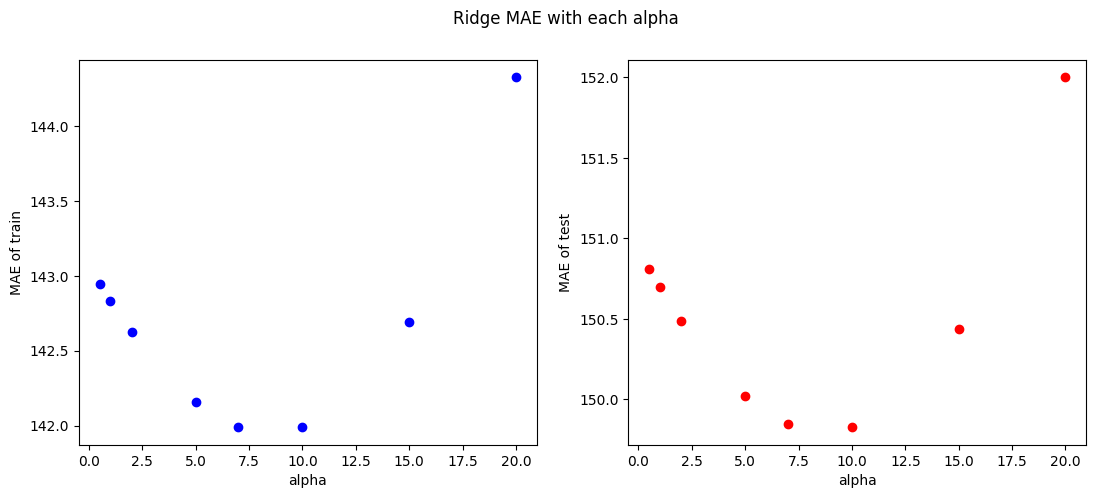

In [ ]:
train = []
test = []
for i in range(len(grid[0]['alpha'])):
  model = Ridge(grid[0]['alpha'][i])
  model.fit(trainX, trainY)
  pred_train = model.predict(trainX)   
  train.append(mean_absolute_error(y_pred=pred_train, y_true=trainY))
  pred_test = model.predict(testX)   
  test.append(mean_absolute_error(y_pred=pred_test, y_true=testY))
fig, ax = plt.subplots(1,2, figsize=(13,5))
ax[0].plot(grid[0]['alpha'], train, 'bo')
ax[0].set_xlabel('alpha')
ax[0].set_ylabel('MAE of train')
ax[1].plot(grid[0]['alpha'], test, 'ro')
ax[1].set_xlabel('alpha')
ax[1].set_ylabel('MAE of test')
fig.suptitle('Ridge MAE with each alpha')

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
grid = [
    {'alpha': [0.1, 0.5, 1, 2, 5, 7, 9, 10, 12, 15, 20], 'l1_ratio': [0.1, 0.2, 0.5, 0.7, 0.9, 1]}
    ]
from sklearn.model_selection import GridSearchCV
model = ElasticNet()
grid_search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=None)
grid_search.fit(trainX,trainY)
grid_search.best_params_

{'alpha': 0.1, 'l1_ratio': 1}

Text(0.5, 0.98, 'ElasticNet MAE with each alpha, l1_ratio = 1')

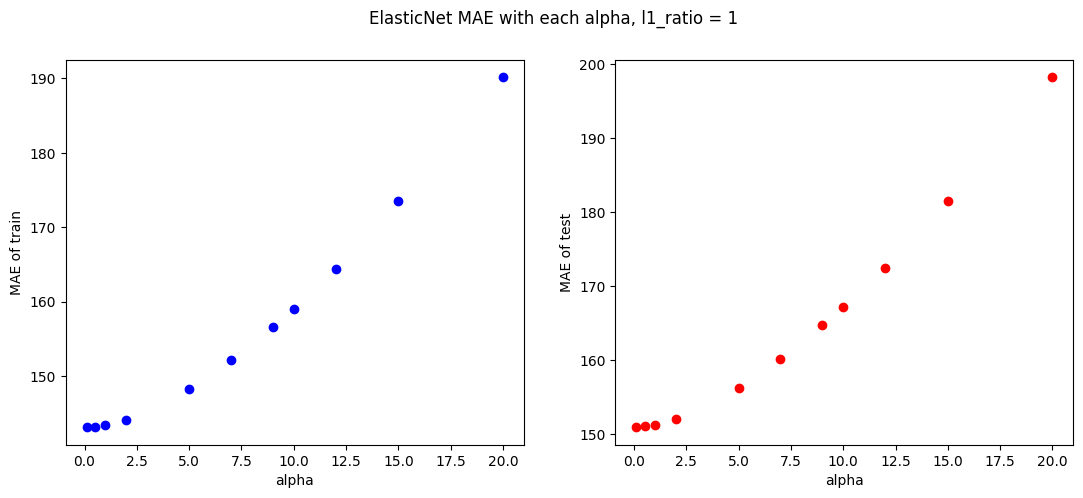

In [ ]:
train = []
test = []
for i in range(len(grid[0]['alpha'])):
  model = ElasticNet(grid[0]['alpha'][i], l1_ratio = 1)
  model.fit(trainX, trainY)
  pred_train = model.predict(trainX)   
  train.append(mean_absolute_error(y_pred=pred_train, y_true=trainY))
  pred_test = model.predict(testX)   
  test.append(mean_absolute_error(y_pred=pred_test, y_true=testY))
fig, ax = plt.subplots(1,2, figsize=(13,5))
ax[0].plot(grid[0]['alpha'], train, 'bo')
ax[0].set_xlabel('alpha')
ax[0].set_ylabel('MAE of train')
ax[1].plot(grid[0]['alpha'], test, 'ro')
ax[1].set_xlabel('alpha')
ax[1].set_ylabel('MAE of test')
fig.suptitle('ElasticNet MAE with each alpha, l1_ratio = 1')

Text(0.5, 0.98, 'ElasticNet MAE with each alpha, l1_ratio = 0.9')

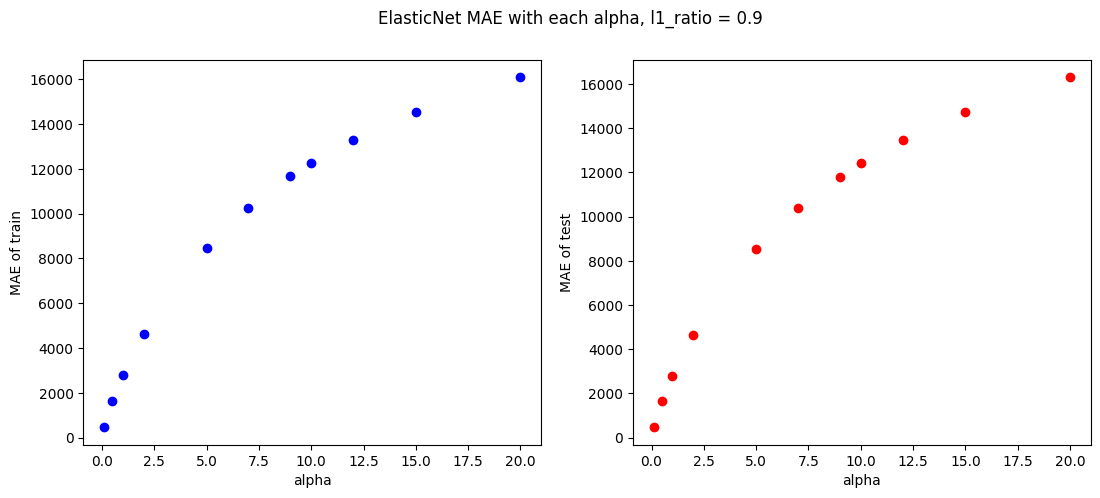

In [ ]:
train = []
test = []
for i in range(len(grid[0]['alpha'])):
  model = ElasticNet(grid[0]['alpha'][i], l1_ratio = 0.9)
  model.fit(trainX, trainY)
  pred_train = model.predict(trainX)   
  train.append(mean_absolute_error(y_pred=pred_train, y_true=trainY))
  pred_test = model.predict(testX)   
  test.append(mean_absolute_error(y_pred=pred_test, y_true=testY))
fig, ax = plt.subplots(1,2, figsize=(13,5))
ax[0].plot(grid[0]['alpha'], train, 'bo')
ax[0].set_xlabel('alpha')
ax[0].set_ylabel('MAE of train')
ax[1].plot(grid[0]['alpha'], test, 'ro')
ax[1].set_xlabel('alpha')
ax[1].set_ylabel('MAE of test')
fig.suptitle('ElasticNet MAE with each alpha, l1_ratio = 0.9')